In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('E:\\prasad\\practice\\Deep Learning-29-12-20\\Air Quality Index')

In [3]:
df=pd.read_csv('Real_Combine.csv')

In [4]:
df.shape

(1093, 9)

In [5]:
df.head(2)

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500


In [6]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.shape

(1092, 9)

In [9]:
df.head(2)

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500


In [10]:
X=df.iloc[:,:-1]
X.head(2)

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1


In [11]:
y=df.iloc[:,-1:]
y.head(2)

,PM 2.5
0,219.720833
1,182.187500


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((873, 8), (219, 8), (873, 1), (219, 1))

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [16]:
model=Sequential()
model.add(Dense(5,kernel_initializer='uniform',activation='relu',input_dim=8))
model.add(Dense(5,kernel_initializer='uniform',activation='relu'))
model.add(Dense(1,kernel_initializer='uniform',activation='linear'))

In [17]:
model.compile('Adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [18]:
model.fit(X_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
88/88 [==============================] - 1s 1ms/step - loss: 114.8956 - mean_absolute_error: 114.8956
Epoch 2/100
88/88 [==============================] - 0s 2ms/step - loss: 98.8952 - mean_absolute_error: 98.8952
Epoch 3/100
88/88 [==============================] - 0s 1ms/step - loss: 70.1531 - mean_absolute_error: 70.1531
Epoch 4/100
88/88 [==============================] - 0s 2ms/step - loss: 71.6335 - mean_absolute_error: 71.6335
Epoch 5/100
88/88 [==============================] - 0s 1ms/step - loss: 67.1006 - mean_absolute_error: 67.1006
Epoch 6/100
88/88 [==============================] - 0s 2ms/step - loss: 64.4616 - mean_absolute_error: 64.4616
Epoch 7/100
88/88 [==============================] - 0s 1ms/step - loss: 65.9893 - mean_absolute_error: 65.9893
Epoch 8/100
88/88 [==============================] - 0s 2ms/step - loss: 65.4083 - mean_absolute_error: 65.4083
Epoch 9/100
88/88 [==============================] - 0s 2ms/step - loss: 64.4847 - mean_absolute_error

88/88 [==============================] - 0s 1ms/step - loss: 49.6453 - mean_absolute_error: 49.6453
Epoch 74/100
88/88 [==============================] - 0s 1ms/step - loss: 47.1078 - mean_absolute_error: 47.1078
Epoch 75/100
88/88 [==============================] - 0s 1ms/step - loss: 47.7258 - mean_absolute_error: 47.7258
Epoch 76/100
88/88 [==============================] - 0s 1ms/step - loss: 45.6862 - mean_absolute_error: 45.6862
Epoch 77/100
88/88 [==============================] - 0s 1ms/step - loss: 48.0498 - mean_absolute_error: 48.0498
Epoch 78/100
88/88 [==============================] - 0s 1ms/step - loss: 48.5430 - mean_absolute_error: 48.5430
Epoch 79/100
88/88 [==============================] - 0s 1ms/step - loss: 46.0403 - mean_absolute_error: 46.0403
Epoch 80/100
88/88 [==============================] - 0s 1ms/step - loss: 47.8389 - mean_absolute_error: 47.8388
Epoch 81/100
88/88 [==============================] - 0s 1ms/step - loss: 46.6904 - mean_absolute_error: 46.6

In [19]:
y_pred=model.predict(X_test)

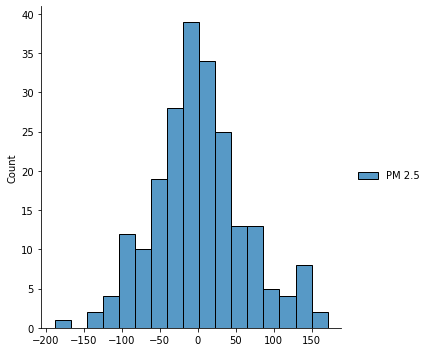

In [22]:
sns.displot(y_test-y_pred)

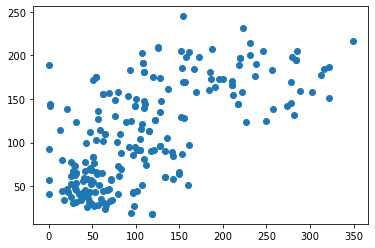

In [28]:
plt.scatter(y_test,y_pred)
plt.show()